# **Desafio**

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.


### ATENÇÃO!!

Respostas das questões estam respondidas ao final desse arquivo, após toda a análise

# Resolução


In [1]:
!pip freeze > requirements_v0.txt

In [2]:
#import bibliotecas

import numpy as np
import pandas as pd


#machine learning
import keras

#data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Importe os modelos de regressão necessários
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split

#preprocessamento

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [6]:
#import arquivo dataset
precificacao = pd.read_csv('teste_indicium_precificacao.csv')

In [7]:
#confirmando arquivo importado
precificacao.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [8]:
#criando dataframe com as colunas importantes para analise.

preco_df = precificacao[['id', 'nome', 'bairro_group', 'bairro', 'room_type', 'price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']]
print('Total number of rows: {0}\n\n'.format(len(preco_df.index)))
preco_df.head()



Total number of rows: 48894




,id,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365
0,2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,NaN,365
2,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,129


In [9]:
#informações estatisticas sobre o dataframe
print('Total number of rows: {0}\n\n'.format(len(preco_df.index)))
preco_df.describe(include='all')

Total number of rows: 48894




,id,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365
count,4.889400e+04,48878,48894,48894,48894,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000
unique,NaN,47904,5,221,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,Manhattan,Williamsburg,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,21661,3920,25409,NaN,NaN,NaN,NaN,NaN
mean,1.901753e+07,NaN,NaN,NaN,NaN,152.720763,7.030085,23.274758,1.373251,112.776169
std,1.098288e+07,NaN,NaN,NaN,NaN,240.156625,20.510741,44.550991,1.680453,131.618692
min,2.595000e+03,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.010000,0.000000
25%,9.472371e+06,NaN,NaN,NaN,NaN,69.000000,1.000000,1.000000,0.190000,0.000000
50%,1.967743e+07,NaN,NaN,NaN,NaN,106.000000,3.000000,5.000000,0.720000,45.000000
75%,2.915225e+07,NaN,NaN,NaN,NaN,175.000000,5.000000,24.000000,2.020000,227.000000


In [10]:
preco_df.dtypes

,0
id,int64
nome,object
bairro_group,object
bairro,object
room_type,object
price,int64
minimo_noites,int64
numero_de_reviews,int64
reviews_por_mes,float64
disponibilidade_365,int64


In [11]:
#verificar quantidade de valores nulos  por campo
preco_df.isnull().sum()

,0
id,0
nome,16
bairro_group,0
bairro,0
room_type,0
price,0
minimo_noites,0
numero_de_reviews,0
reviews_por_mes,10052
disponibilidade_365,0


Verificado 10052 linhas no campo reviews_por_mes, com dados nulos.

In [12]:
#Verificar os valores nulos na coluna reviews_por_mes e na coluna nome
preco_df[preco_df['reviews_por_mes'].isnull()]

#tirando itens com nome zerado e sem disponibilidade
preco_df = preco_df.loc[~(preco_df['nome'].isna() & (preco_df['disponibilidade_365'] == 0))]

#removendo a linha com nome zerado e minimo_de_noites = 1000
preco_df = preco_df.loc[~(preco_df['nome'].isna() & (preco_df['minimo_noites'] == 1000))]

#Adicionando o texto "desconhecido" as campos "nome" que estão com valores nulos
preco_df['nome'] = preco_df['nome'].fillna('desconhecido')


In [13]:
#substituindo os valos NaN por 0
preco_df['reviews_por_mes'] = preco_df['reviews_por_mes'].fillna(0)

In [14]:
#verificar quantidade de valores nulos  por campo
preco_df.isnull().sum()

,0
id,0
nome,0
bairro_group,0
bairro,0
room_type,0
price,0
minimo_noites,0
numero_de_reviews,0
reviews_por_mes,0
disponibilidade_365,0


In [15]:
preco_df.describe()

,id,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365
count,4.888100e+04,48881.000000,48881.000000,48881.000000,48881.000000,48881.000000
mean,1.902035e+07,152.720832,7.010822,23.280702,1.091210,112.798756
std,1.098263e+07,240.182456,20.015618,44.555414,1.597412,131.619504
min,2.595000e+03,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.474607e+06,69.000000,1.000000,1.000000,0.040000,0.000000
50%,1.968202e+07,106.000000,3.000000,5.000000,0.370000,45.000000
75%,2.915317e+07,175.000000,5.000000,24.000000,1.580000,227.000000
max,3.648724e+07,10000.000000,1250.000000,629.000000,58.500000,365.000000


Limpeza de dados e dataframe realizada!

## *Análises Exploratórias*

In [16]:
#Questões iniciais sobre preços

'''
# Qual o preço médio de aluguel?
# Qual o preço minimo de aluguel?
# Qual o preço máximo de aluguel?

'''
# Qual o preço médio de aluguel?
mean_price = preco_df['price'].mean()
print(f'O preço médio de aluguel é de: {mean_price}')

# Qual é o preço minimo de aluguel?
min_price_zero = preco_df[preco_df['price'] > 0]['price'].min()
print(f'O preço mínimo de aluguel é de: {min_price_zero}')

# Qual o preço máximo de aluguel?
max_price = preco_df['price'].max()
print(f'O preço máximo de aluguel é de: {max_price}')



O preço médio de aluguel é de: 152.72083222519998
O preço mínimo de aluguel é de: 10
O preço máximo de aluguel é de: 10000


A diferença entre preço mais baixo e mais alto, é muito alto.
Análises abaixo explicam sobre esse extremo.


In [17]:
#Questões iniciais sobre os imoveis e bairros

'''
# Quais os  bairros tem os maiores números de imóveis listados?
# Qual os grupos de bairros com maiores números de reviews?
# Qual é o grupo de bairros com o maior preço médio de aluguel?
# Qual é o grupo de bairros com o menor preço médio de aluguel?
# Qual bairro possui maior disponibilidade (média)?

'''

# Quais os bairros tem os maiores números de imóveis listados?
max_bairro = preco_df['bairro'].value_counts()
print(f'Os bairros com maiores números de imóveis listados são: {max_bairro.head(10)}')

# Qual os grupos de bairros com maiores números de reviews?
max_reviews_bairro = preco_df.groupby('bairro_group')['numero_de_reviews'].max()
print(f'Os grupos de bairros com maiores números de reviews são: {max_reviews_bairro}')

# Qual é o grupo de bairros com o maior preço médio de aluguel?
max_bairro_price = preco_df.groupby('bairro_group')['price'].mean().idxmax()
print(f'O grupo de bairros com o maior preço médio de aluguel é: {max_bairro_price}')

# Qual é o grupo de bairros com o menor preço médio de aluguel?
min_bairro_price = preco_df.groupby('bairro_group')['price'].mean().idxmin()
print(f'O grupo de bairros com o menor preço médio de aluguel é: {min_bairro_price}')

# Qual bairro possui maior disponibilidade (média)?
mean_avail_max = preco_df.groupby('bairro_group')['disponibilidade_365'].mean().idxmax()
print(f'O bairro com maior disponibilidade média é: {mean_avail_max}')



Os bairros com maiores números de imóveis listados são: bairro
Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2657
Bushwick              2463
Upper West Side       1970
Hell's Kitchen        1957
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64
Os grupos de bairros com maiores números de reviews são: bairro_group
Bronx            321
Brooklyn         488
Manhattan        607
Queens           629
Staten Island    333
Name: numero_de_reviews, dtype: int64
O grupo de bairros com o maior preço médio de aluguel é: Manhattan
O grupo de bairros com o menor preço médio de aluguel é: Bronx
O bairro com maior disponibilidade média é: Staten Island


In [18]:
#Ordenando os dados por preços de aluguel de forma decrescente
preco_df_sorted = preco_df.sort_values(by='price', ascending=False)
preco_df_sorted.head(10)

,id,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365
29237,22436899,1-BR Lincoln Center,Manhattan,Upper West Side,Entire home/apt,10000,30,0,0.00,83
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0.16,0
9150,7003697,Furnished room in Astoria apartment,Queens,Astoria,Private room,10000,100,2,0.04,0
6529,4737930,Spanish Harlem Apt,Manhattan,East Harlem,Entire home/apt,9999,5,1,0.02,0
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,Entire home/apt,9999,30,0,0.00,365
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Private room,9999,99,6,0.14,83
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,Entire home/apt,8500,30,2,0.18,251
4376,2953058,Film Location,Brooklyn,Clinton Hill,Entire home/apt,8000,1,1,0.03,365
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,Entire home/apt,7703,1,0,0.00,146
45665,34895693,Gem of east Flatbush,Brooklyn,East Flatbush,Private room,7500,1,8,6.15,179


In [19]:
# Média de preços por grupo de bairros
mean_price_bairro = preco_df.groupby('bairro_group')['price'].mean()
print(mean_price_bairro)

bairro_group
Bronx             87.496792
Brooklyn         124.390785
Manhattan        196.877569
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


Os grupos de bairros com maiores números de reservas são: bairro_group
Manhattan        21653
Brooklyn         20098
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


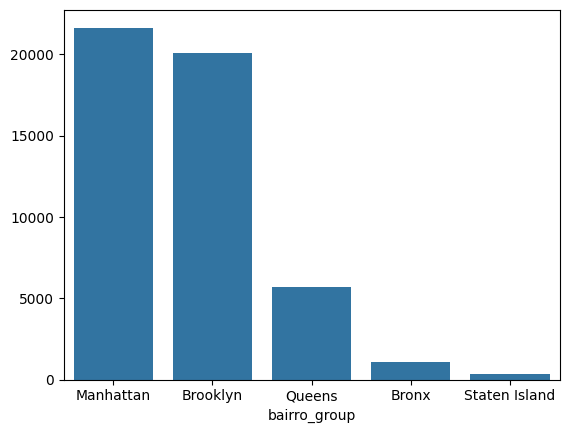

In [20]:
#Grupos de Bairros com maior múmero de reservas

preco_df_bairro = preco_df['bairro_group'].value_counts()
print(f'Os grupos de bairros com maiores números de reservas são: {preco_df_bairro}')

sns.barplot(x=preco_df_bairro.index, y=preco_df_bairro.values)
plt.show()

Sobre a grande diferença entre preço mais alto e mais baixo, vamos filtrar mais os valores e tentar entender os números.


In [21]:
#Total de anúncios:

total_anuncios = len(preco_df)
print(f'O total de anúncios é: {total_anuncios}')

#Quantidade de anuncios abaixo de 100,00
abaixo_100 = preco_df[preco_df['price'] < 100]['price'].count()
print(f'A quantidade de anúncios abaixo de 100,00 por noite é: {abaixo_100}')

#Quantidade de anúncios entre 100,00 e 200,00
entre_100_200 = preco_df[(preco_df['price'] >= 100) & (preco_df['price'] <= 200)]['price'].count()
print(f'A quantidade de anúncios entre 100,00 e 200,00 por noite é: {entre_100_200}')

#Quantidade de anúncios entre 200,00 e 500,00
entre_200_500 = preco_df[(preco_df['price'] >= 200) & (preco_df['price'] <= 500)]['price'].count()
print(f'A quantidade de anúncios entre 200,00 e 500,00 por noite é: {entre_200_500}')

#Quantidade de anúncios entre 500,00 e 1000,00
entre_500_1000 = preco_df[(preco_df['price'] >= 500) & (preco_df['price'] <= 1000)]['price'].count()
print(f'A quantidade de anúncios entre 500,00 e 1000,00 por noite é: {entre_500_1000}')

#Quantidade de anúncios acima de 1000,00

acima_1000 = preco_df[preco_df['price'] > 1000]['price'].count()
print(f'A quantidade de anúncios acima de 1000,00 por noite é: {acima_1000}')

O total de anúncios é: 48881
A quantidade de anúncios abaixo de 100,00 por noite é: 21872
A quantidade de anúncios entre 100,00 e 200,00 por noite é: 18629
A quantidade de anúncios entre 200,00 e 500,00 por noite é: 8737
A quantidade de anúncios entre 500,00 e 1000,00 por noite é: 996
A quantidade de anúncios acima de 1000,00 por noite é: 239


Percebe-se que em 48881 imóveis anunciados, a média geral está bem abaixo de 1000,00 (152,72) e a média de preços por grupos de bairros também está bem abaixo em todos os bairros.

Em 48881 imóveis, somente 239 estão acima de 1000,00. Provavelmente são considerados outliers, o que iremos confirmar mais abaixo.

In [22]:
#Questões  sobre os tipos de imoveis

'''
# Qual o preço médio para o tipo Entire home/apt?
# Qual o preço médio para o tipo Private room?
# Qual o preço médio para o tipo Shared room?

'''

# Qual o preço médio para o tipo Entire home/apt?
mean_entire = preco_df[preco_df['room_type'] == 'Entire home/apt']['price'].mean()
print(f'O preço médio para o tipo Entire home/apt é: {mean_entire}')

# Qual o preço médio para o tipo Private room?
mean_private = preco_df[preco_df['room_type'] == 'Private room']['price'].mean()
print(f'O preço médio para o tipo Private room é: {mean_private}')

# Qual o preço médio para o tipo Shared room?
mean_shared = preco_df[preco_df['room_type'] == 'Shared room']['price'].mean()
print(f'O preço médio para o tipo Shared room é: {mean_shared}')



O preço médio para o tipo Entire home/apt é: 211.78758414360507
O preço médio para o tipo Private room é: 89.78219374495923
O preço médio para o tipo Shared room é: 70.12758620689655


room_type
Entire home/apt    25403
Private room       22318
Shared room         1160
Name: count, dtype: int64


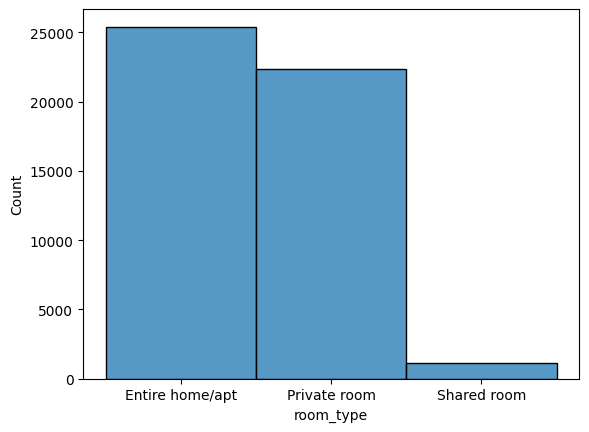

In [23]:
# E a quantidade disponível de cada tipo de imóvel em lista e gráfico

df_type = preco_df['room_type'].value_counts()
print(df_type)

sns.histplot(data=preco_df, x='room_type')
plt.show()


## Outliers

Coluna nome não é numérica
Coluna bairro_group não é numérica
Coluna bairro não é numérica
Coluna room_type não é numérica


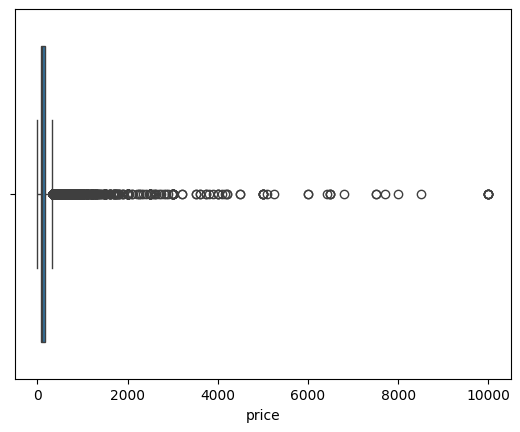

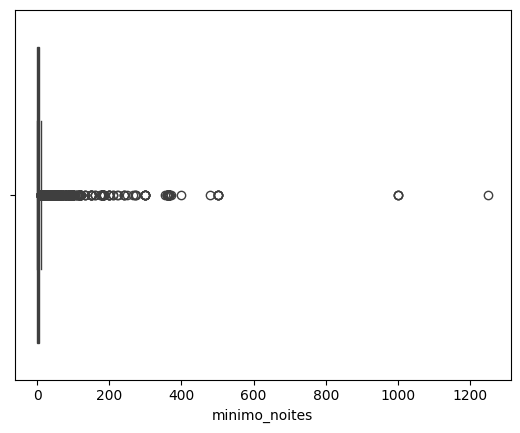

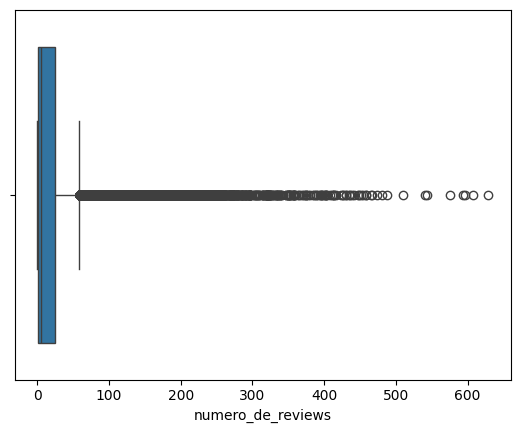

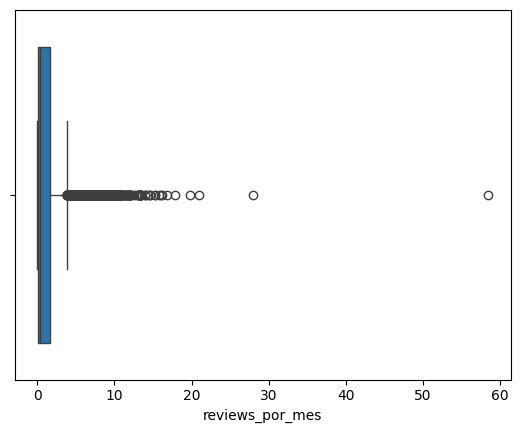

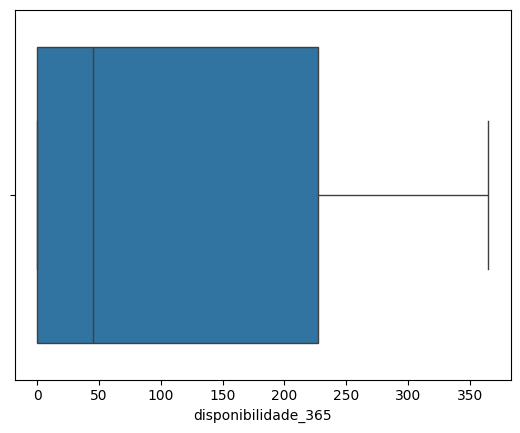

In [24]:
colunas_fora = ['id']

for col in preco_df.columns:
  if col != 'id':
    if pd.api.types.is_numeric_dtype(preco_df[col]):
      sns.boxplot(data=preco_df, x=col)
      plt.show()
    else:
      print(f"Coluna {col} não é numérica")

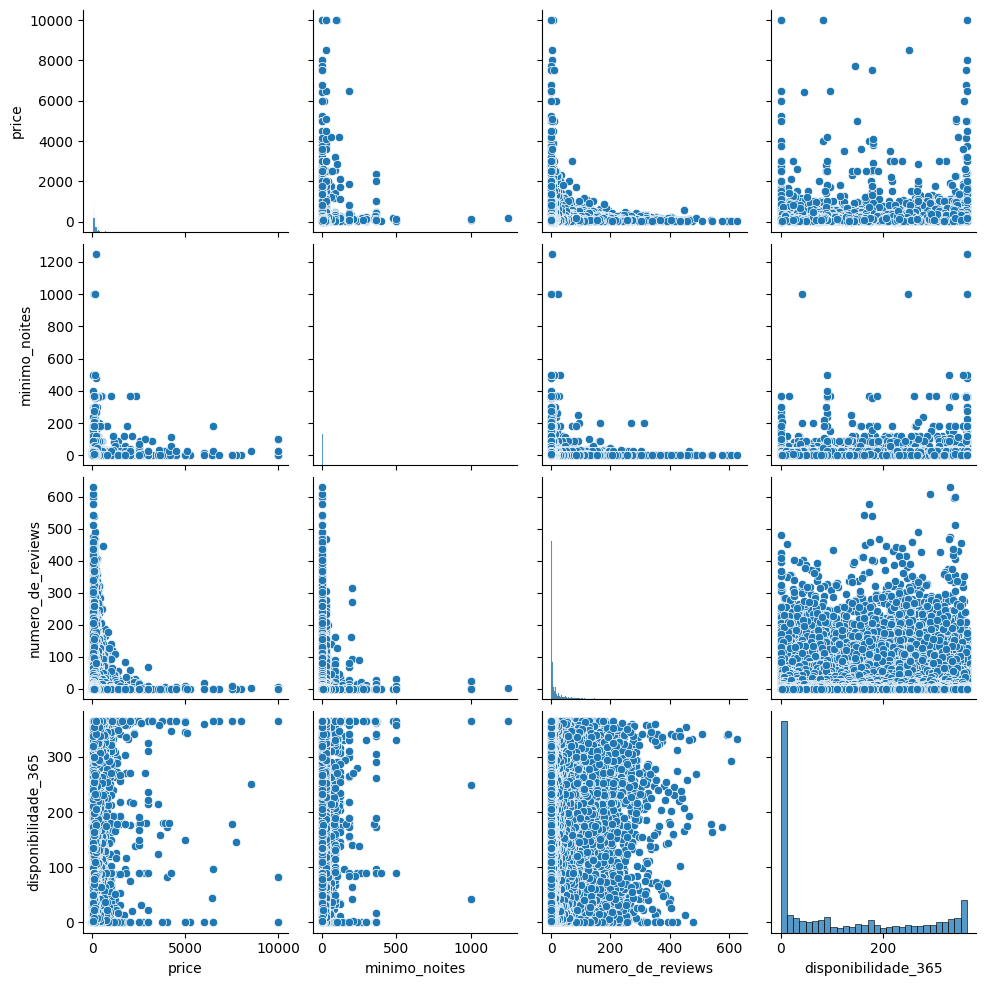

In [25]:
#Pairplot

sns.pairplot(preco_df, x_vars=["price", "minimo_noites","numero_de_reviews", "disponibilidade_365"], y_vars=["price", "minimo_noites","numero_de_reviews", "disponibilidade_365"])
plt.show()

## Utilizando metodo IQR para identificação de Outliers

Definição de IQR (Intervalo Interquartil)

- O intervalo interquartil (IQR) é uma medida estatística que indica a dispersão dos 50% do meio de um conjunto de dados. É a diferença entre o primeiro quartil Q1 e o terceiro quartil Q3.

- O IQR é calculado pela fórmula Q3 - Q1

- Os quartis são marcadores que dividem os dados em quatro grupos de tamanhos iguais. O primeiro quartil Q1 é o meio da metade inferior dos dados, e o terceiro quartil Q3 é o meio da metade superior.

- O IQR é usado para detectar valores anormalmente grandes ou pequenos, chamados outliers. É importante na bioinformática e na ciência de dados.

- Utiliza-se o multiplacador 1,5, considerando ser o equilibrio entre rigor e sensibilidade. Ele identifica outliers que se desviam aproximadamente 1,5 vezes o IQR dos quartis superior ou inferior, capturando desvios significativos da faixa esperada sem ser excessivamente rigoroso ou excessivamente permissivo.

In [26]:
preco_df.head(5)

,id,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365
0,2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,0.00,365
2,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,129


In [27]:
#Criando um backup de dataframe:

preco_df_wc = preco_df.copy()
preco_df.original = preco_df.copy()

#colunas indesejadas

colunas_indesejadas = ['id', 'nome', 'disponibilidade_365', 'bairro_group', 'bairro', 'room_type']

#removendo colunas indesejadas

preco_df_numeric = preco_df.drop(colunas_indesejadas, axis=1)

#Analisando outliers com IQR:

Q1 = preco_df_numeric.quantile(0.25, numeric_only=True)
Q3 = preco_df_numeric.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1

multiplicador = 1.5

preco_df_filtered = preco_df_numeric[~((preco_df_numeric < (Q1 - multiplicador * IQR)) | (preco_df_numeric > (Q3 + multiplicador * IQR))).any(axis=1)]

#Voltando colunas
preco_df = preco_df_filtered.merge(preco_df.original[colunas_indesejadas], left_index=True, right_index=True)

<ipython-input-27-1c4a863e4e04>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  preco_df.original = preco_df.copy()


In [28]:
preco_df.shape


(32472, 10)

## Preparação e processamento dos dados

In [29]:
#Tipos de dados
preco_df.dtypes

,0
price,int64
minimo_noites,int64
numero_de_reviews,int64
reviews_por_mes,float64
id,int64
nome,object
disponibilidade_365,int64
bairro_group,object
bairro,object
room_type,object


In [30]:
#organização de dados


x = preco_df.drop(['price', 'id', 'nome', 'bairro'], axis=1)
y = preco_df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
#variaveis

nums = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']
cats = ['bairro_group', 'room_type']


In [32]:
#preprocessamento

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), nums),
        ('cat', OneHotEncoder(sparse_output=False), cats)
    ])

## Avaliando os modelos.

Como o que importa é regressão, resolvi testar os modelos mais usados em regressões.


In [33]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet Regression', ElasticNet()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor())
]

for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name}: RMSE={rmse:.2f}, R2={r2:.2f}, MAE={mae:.2f}')

Linear Regression: RMSE=50.74, R2=0.45, MAE=37.46
Ridge Regression: RMSE=50.74, R2=0.45, MAE=37.46
Lasso Regression: RMSE=51.18, R2=0.44, MAE=37.94
ElasticNet Regression: RMSE=57.11, R2=0.30, MAE=44.36
Decision Tree Regression: RMSE=65.45, R2=0.08, MAE=46.92
Random Forest Regression: RMSE=52.44, R2=0.41, MAE=38.31
Gradient Boosting Regression: RMSE=49.77, R2=0.47, MAE=36.53
Support Vector Regression: RMSE=52.06, R2=0.42, MAE=36.75
K-Nearest Neighbors Regression: RMSE=54.22, R2=0.37, MAE=39.70
Neural Network Regression: RMSE=49.86, R2=0.47, MAE=36.41


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Gradient Booster apresenta um bom desempenho, considerando RMSE (Raiz do Erro Quadrático Médio) e MAE (Erro Médio Absoluto), bem proximo de Redes Neurais

Utilizando Gradient Booster Regression

In [34]:
#Treinando o modelo

model = GradientBoostingRegressor()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train) #treinamento do modelo

#Avaliando  o modelo

y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE={rmse:.2f}, R2={r2:.2f}, MAE={mae:.2f}')

#prevendo apartamento do desafio

apto_desafio = pd.DataFrame([
    {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
])

previsao_preco = pipeline.predict(apto_desafio)
print(f'Preco sugerido do apartamento do desafio: {previsao_preco[0]:.2f}')

RMSE=49.77, R2=0.47, MAE=36.53
Preco sugerido do apartamento do desafio: 193.61


## Preco sugerido do apartamento do desafio: 193.61


Comparando Gradient Booster com Redes Neurais

In [35]:
#Treinando o modelo

model = MLPRegressor()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train) #treinamento do modelo

#Avaliando  o modelo

y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE={rmse:.2f}, R2={r2:.2f}, MAE={mae:.2f}')

#prevendo apartamento do desafio

apto_desafio = pd.DataFrame([
    {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
])

previsao_preco = pipeline.predict(apto_desafio)
print(f'Preco sugerido do apartamento do desafio: {previsao_preco[0]:.2f}')

RMSE=49.87, R2=0.47, MAE=36.51
Preco sugerido do apartamento do desafio: 187.21


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Graficos sobre a questão 2, letra B, onde é perguntado sobre minimo_de_noites e disponibilidade_365 interferirem no preço.  

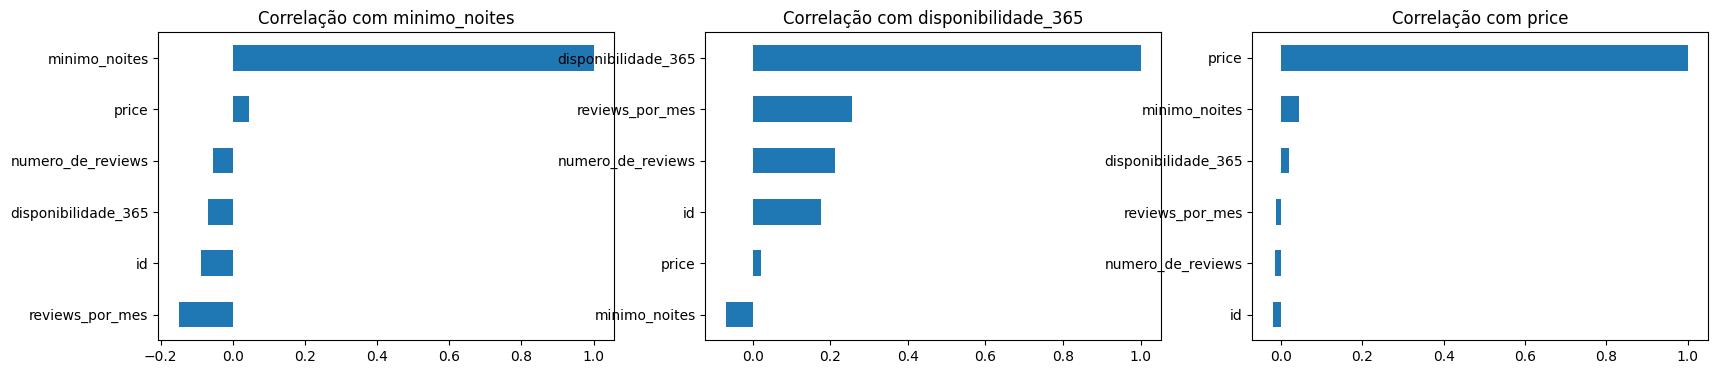

In [36]:
#Correlação

colunas = ['minimo_noites', 'disponibilidade_365', 'price']
plt.figure(figsize=(20, 4))


for i, column in enumerate(colunas):
    plt.subplot(1, 3, i+1)
    preco_df.corr(numeric_only=True)[column].sort_values().plot(kind='barh')
    plt.title(f'Correlação com {column}')


plt.show()

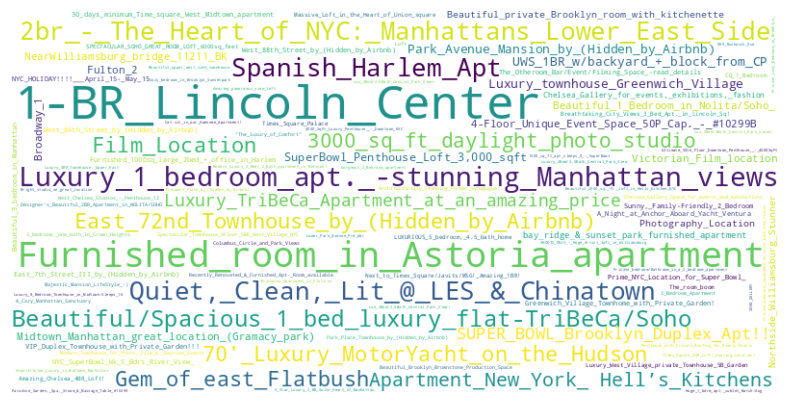

In [37]:
#Nuvens de Palavras
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

preco_df_wc['nome'] = preco_df_wc['nome'].str.replace(' ', '_')

#criar um dicionário com os 'nome' e price > 1000
dict_price = preco_df_wc[preco_df_wc['price'] > 1000].groupby('nome')['price'].mean().to_dict()

#dict_price = preco_df.groupby('nome')['price'].mean().to_dict()

# Remove newline characters from the keys of dict_price
for key in list(dict_price.keys()):
    new_key = key.replace('\n', ' ')  # Replacing newline with a space
    dict_price[new_key] = dict_price.pop(key)



#inicia a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict_price)

#mostra a imagem
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# Respostas:


### **a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**

Resposta: Queens é o bairro com maior número de reviews, um elevado número de reservas e com valor médio próximo ao de outros bairros mais caros. Além disso, maior número de reservas pode indicar mais apartamentos alugados e e alta rotatividade




_____________________________

### **b) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**

Resposta: Analisando a correlação entre as colunas, concluimos que o número minimo de noites e disponibilidade ao longo do ano, intereferem pouco ou quase nao interferem no preço.

____________________________

### **c) Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

Resposta: Sim. Observou-se o uso de palavras relacionadas a classes mais altas como: Luxury, Five-star, Palace, Mansion, Duplex


___________________________

### **3 - Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**

Respostas:

- A previsão de preço foi feita utilizando o modelo Gradient Booster Regression, com o modelo Redes Neurais regression apresentando uma previsão bem próxima. O método foi explicado no código acima.

- Durante a preparação dos dados, utilizamos as variáveis da seguinte maneira:
nums = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']
cats = ['bairro_group', 'room_type']

Essas variáveis estão separadas em numerais e categoricas, e utilizando StandardScaler, padronizando as variaveis numéricas e OneHotEncoder padronizando as variaveis categóricas (representações binárias em novas colunas.)


- O problema resolvido foi de "Regressão", trabalhando com previsão numérica.

- O modelo com melhor performance foi o Gradient Booster Regression.

- Foi utilizado a medida RMSE (Raiz do Erro Quadrático Médio), que por está ao quadrado, penaliza grandes diferenças entre valor previsto e o ideal. Por ser afetado por valores discrepantes, RMSE garante uma avaliação mais criteriosa do modelo.

________________________

### **4 - Supondo um apartamento com as seguintes características:**

*{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}*

### **Qual seria a sua sugestão de preço?**

Resposta: Preco sugerido do apartamento do desafio: 193.61, conforme demonstrado acima
